Завдання:

Вибір Класів для Класифікації:
- Використовуйте останню цифру свого номера у списку групи для вибору першого класу (наприклад, 1 для першого класу, 2 для другого, і так далі, з циклічним поверненням до 1 після 10).
- Другий клас вибирається на основі суми цифр вашого номера у списку. Наприклад, якщо ваш номер - 12, сума цифр буде 1 + 2 = 3, тому другий клас буде 3-м у списку. Якщо сума перевищує 10, продовжуйте віднімати 10, доки не отримаєте число від 1 до 10.

Попередня Обробка Даних:
- Завантажте та розпакуйте набір даних.
- Поділіть дані на тренувальний та тестовий набори.
- Виконайте необхідну попередню обробку даних (нормалізація, ресайзинг тощо).

Розробка Моделі CNN:
- Створіть модель CNN за допомогою TensorFlow.
- Ви можете експериментувати з різними архітектурами та гіперпараметрами.

Тренування та Оцінка Моделі:
- Тренуйте модель на тренувальному наборі даних.
- Оцініть ефективність моделі на тестовому наборі.
- Запишіть результати точності та інші метрики ефективності.

Аналіз Результатів:
- Проаналізуйте отримані результати.
- Оцініть, наскільки ефективно модель розрізняє між обраними класами.
- Обговоріть можливі шляхи покращення моделі.

Додаткові Вимоги:
- Використовуйте TensorFlow для реалізації проекту.
- Поділіть процес роботи на чіткі етапи.
- Забезпечте чистоту та коментування коду.

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import tensorflow as tf
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd

In [5]:
train_data_dir = "./10_food_classes_all_data/10_food_classes_all_data/train/"
test_data_dir = "./10_food_classes_all_data/10_food_classes_all_data/test/"

datagen = ImageDataGenerator(
    rescale=1./255,  # масштабування значень пікселів від 0-255 до 0-1
)

# Зчитування та попередня обробка тестових даних
test_generator = datagen.flow_from_directory(
    directory=test_data_dir,
    target_size=(224, 224),  # розмір зображення
    classes=['chicken_wings', 'sushi'],
    class_mode='categorical'   
)

# Зчитування та попередня обробка тренувальних даних
train_generator = datagen.flow_from_directory(
    directory=train_data_dir,
    target_size=(224, 224),  # розмір зображення
    classes=['chicken_wings', 'sushi'],
    class_mode='categorical'  
)

# Поділ на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(
    train_generator.filenames,
    train_generator.classes,
    test_size=0.2
)

Found 500 images belonging to 2 classes.


Found 1500 images belonging to 2 classes.


- Conv2D шар: Цей шар використовується для виявлення рис або особливостей у вхідних зображеннях за допомогою свертки. У цьому випадку, він використовує 32 фільтри розміром (3, 3).
- activation='relu': Функція активації ReLU (Rectified Linear Unit) використовується для нелінійності. Вона замінює всі від'ємні значення на нуль, а всі позитивні значення залишає без змін.
- input_shape=input_shape: Вказує форму вхідних даних у вигляді (висота, ширина, кількість каналів). Наприклад, якщо вхідні дані - це зображення розміром 28x28 пікселів і має один канал (чорно-біле зображення), то input_shape=(28, 28, 1).


- MaxPooling2D шар: Використовується для пониження просторового розміру виходу з попереднього шару. У цьому випадку, використовуються пулінгові вікна розміром (2, 2), і вибирається максимальне значення з кожного вікна.


- Flatten шар: Використовується для розгортання вихідних даних з попередніх шарів у вектор. Це необхідно перед передачею даних у повністю з'єднаний шар (fully connected layer), який часто використовується для класифікації.

Отже, загальна концепція цього фрагменту коду полягає в створенні моделі CNN для обробки зображень.

In [19]:
input_shape = (224, 224, 3)  # Розмір вхідних зображень
num_classes = 2  # Кількість класів
# Створення моделі
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),   # Перетворення тривимірних фільтрів у одномірний вектор перед подачею на повністю з'єднаний шар
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Компіляція моделі
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  
              metrics=['accuracy'])

# Виведення структури моделі
model.summary()
history = model.fit(train_generator, epochs=9, validation_data=test_generator)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 394272)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               50466944  
                                                                 
 dense_7 (Dense)             (None, 2)                 258       
                                                                 
Total params: 50468098 (192.52 MB)
Trainable params: 50468098 (192.52 MB)
Non-trainable params: 0 (0.00 Byte)
__________

<Axes: title={'center': 'Model History'}>

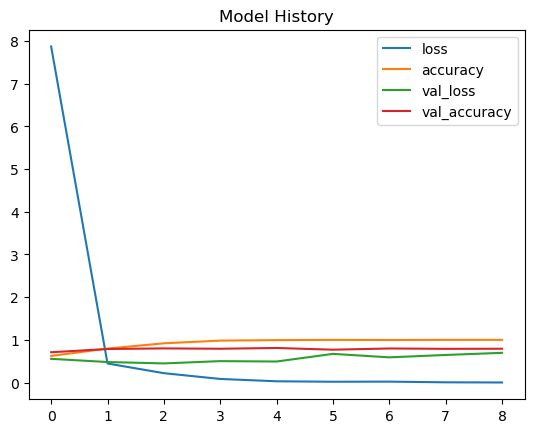

In [21]:
pd.DataFrame(history.history).plot(title="Model History")

Як бачимо на графіку, модель в цілому добре класифікує зображення.